In [20]:
import torch
import torchvision
import torchvision.models as models
import torch.nn as nn
import numpy as np
from torchvision import transforms, datasets
from sklearn import metrics
import time
import copy
import os
import random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import glob
from pathlib import Path
import PIL
import math
import sys
from wilds import get_dataset
from wilds.datasets.wilds_dataset import WILDSSubset
from wilds.common.data_loaders import get_train_loader, get_eval_loader
import torchvision.transforms as transforms
from wilds.common.grouper import CombinatorialGrouper
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf

In [1]:
from utils.plotters import boundingBox
import json
with open('./data/ENA24/ena24_public.json') as f:
    metadata= json.load(f)

In [2]:
metadata['categories']

[{'name': 'Bird', 'id': 0},
 {'name': 'Eastern Gray Squirrel', 'id': 1},
 {'name': 'Eastern Chipmunk', 'id': 2},
 {'name': 'Woodchuck', 'id': 3},
 {'name': 'Wild Turkey', 'id': 4},
 {'name': 'White_Tailed_Deer', 'id': 5},
 {'name': 'Virginia Opossum', 'id': 6},
 {'name': 'Eastern Cottontail', 'id': 7},
 {'name': 'Vehicle', 'id': 9},
 {'name': 'Striped Skunk', 'id': 10},
 {'name': 'Red Fox', 'id': 11},
 {'name': 'Eastern Fox Squirrel', 'id': 12},
 {'name': 'Northern Raccoon', 'id': 13},
 {'name': 'Grey Fox', 'id': 14},
 {'name': 'Horse', 'id': 15},
 {'name': 'Dog', 'id': 16},
 {'name': 'American Crow', 'id': 17},
 {'name': 'Chicken', 'id': 18},
 {'name': 'Domestic Cat', 'id': 19},
 {'name': 'Coyote', 'id': 20},
 {'name': 'Bobcat', 'id': 21},
 {'name': 'American Black Bear', 'id': 22}]

In [4]:
len(metadata['images'])

8789

In [7]:
metadata['images']

[{'id': '1', 'file_name': '1.jpg', 'width': 1920, 'height': 1080},
 {'id': '10', 'file_name': '10.jpg', 'width': 1920, 'height': 1080},
 {'id': '100', 'file_name': '100.jpg', 'width': 1920, 'height': 1080},
 {'id': '1000', 'file_name': '1000.jpg', 'width': 2048, 'height': 1536},
 {'id': '1001', 'file_name': '1001.jpg', 'width': 2048, 'height': 1536},
 {'id': '1002', 'file_name': '1002.jpg', 'width': 2048, 'height': 1536},
 {'id': '1003', 'file_name': '1003.jpg', 'width': 2048, 'height': 1536},
 {'id': '1004', 'file_name': '1004.jpg', 'width': 2048, 'height': 1536},
 {'id': '1005', 'file_name': '1005.jpg', 'width': 2048, 'height': 1536},
 {'id': '1006', 'file_name': '1006.jpg', 'width': 2048, 'height': 1536},
 {'id': '1007', 'file_name': '1007.jpg', 'width': 2048, 'height': 1536},
 {'id': '1008', 'file_name': '1008.jpg', 'width': 2048, 'height': 1536},
 {'id': '1009', 'file_name': '1009.jpg', 'width': 2048, 'height': 1536},
 {'id': '101', 'file_name': '101.jpg', 'width': 2048, 'height':

In [8]:
import tensorflow as tf
from tensorflow.python.platform import gfile
GRAPH_PB_PATH = './models/prefab/md_v4.1.0.pb'
with tf.Session() as sess:
   print("load graph")
   with gfile.FastGFile(GRAPH_PB_PATH,'rb') as f:
       graph_def = tf.GraphDef()
   graph_def.ParseFromString(f.read())
   sess.graph.as_default()
   tf.import_graph_def(graph_def, name='')
   graph_nodes=[n for n in graph_def.node]
   names = []
   for t in graph_nodes:
      names.append(t.name)
   print(names)

AttributeError: module 'tensorflow' has no attribute 'Session'

In [11]:
tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=len(metadata['categories']),
    classifier_activation="softmax",
)

83683744/83683744 [==============================] - 1s 0us/step


In [23]:
basepath = './data/ENA24/images/'
imgpaths = []
for img in metadata['images']:
    imgpaths.append(basepath + str(img['file_name']))

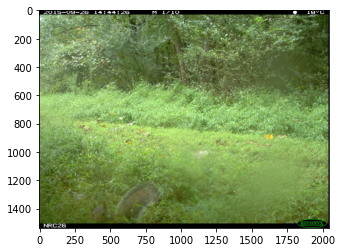

In [34]:
plt.imshow(mpimg.imread())

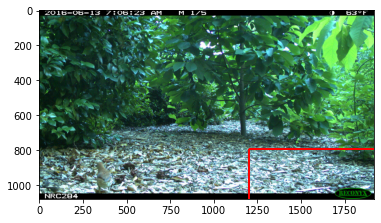

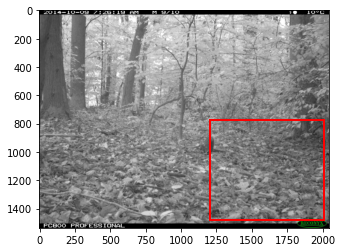

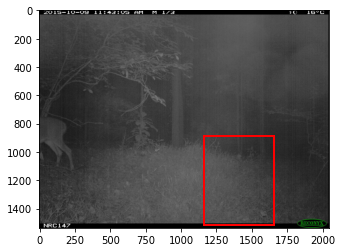

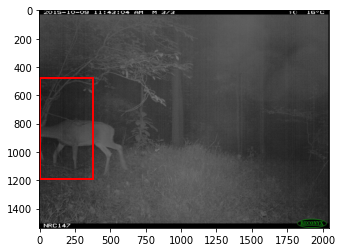

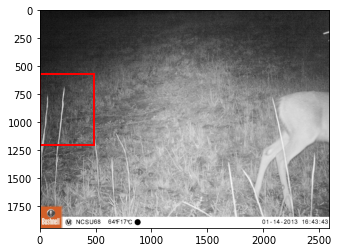

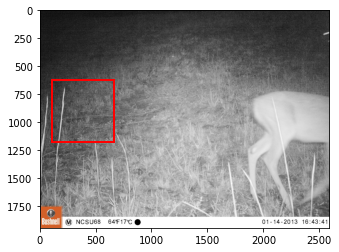

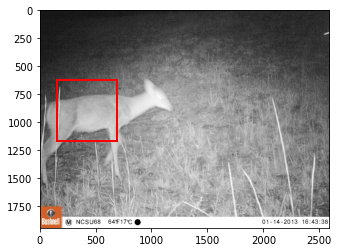

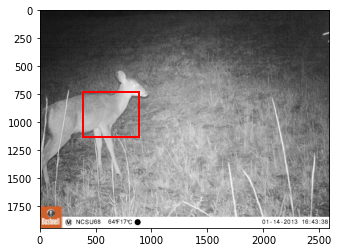

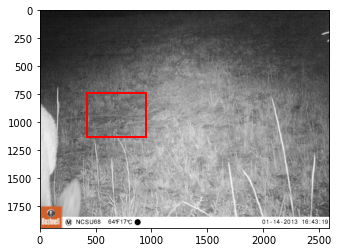

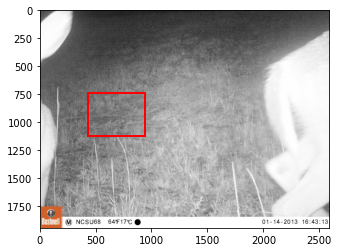

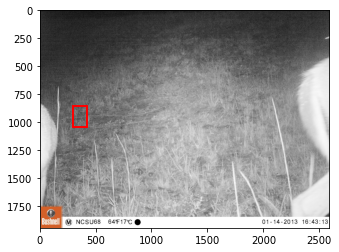

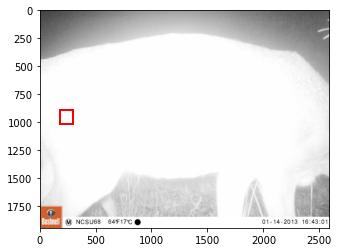

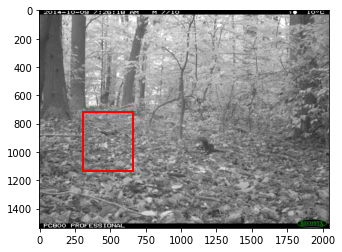

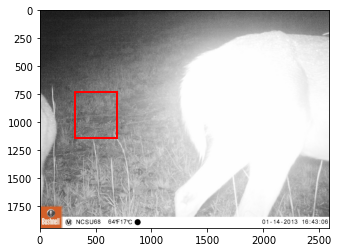

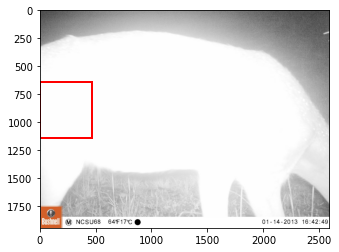

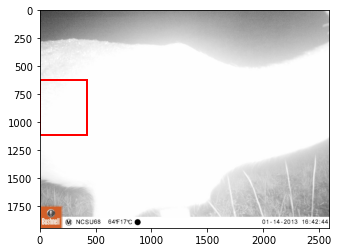

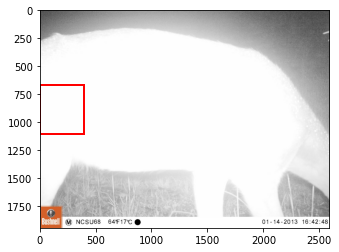

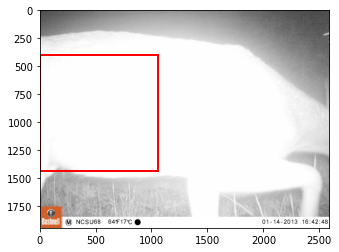

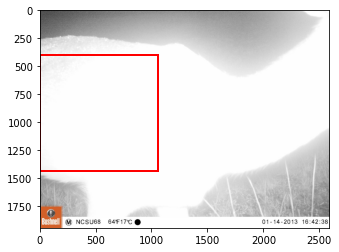

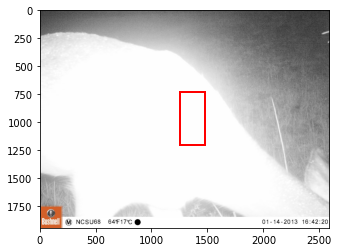

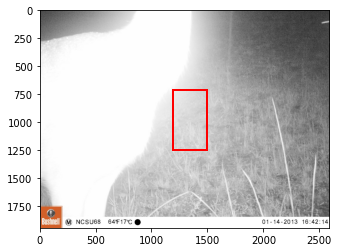

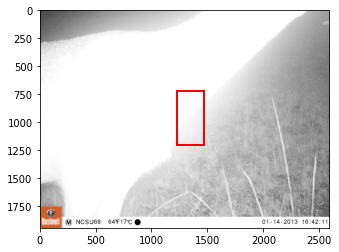

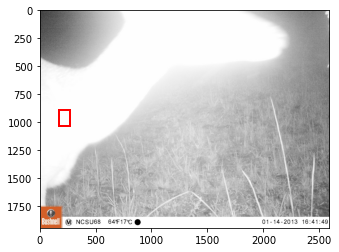

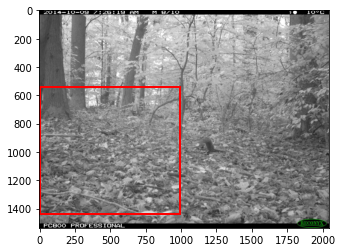

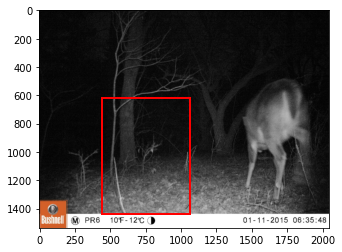

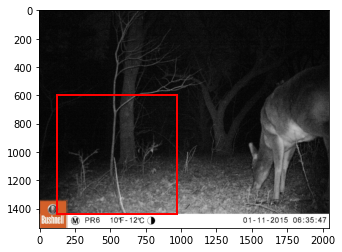

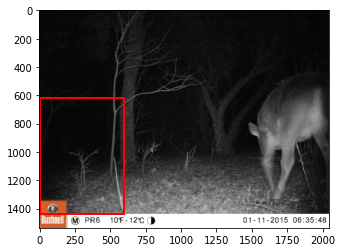

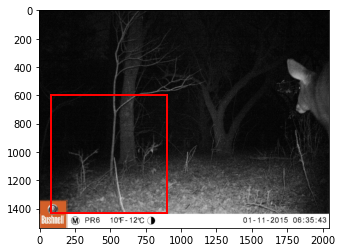

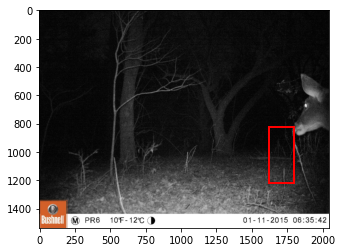

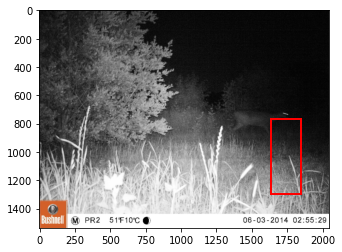

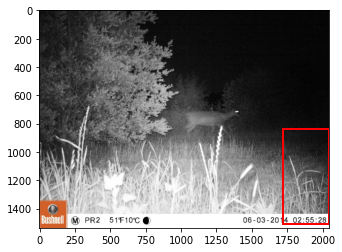

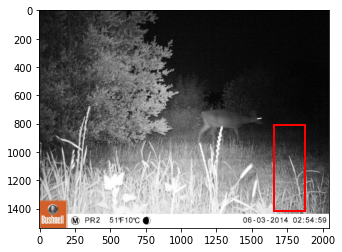

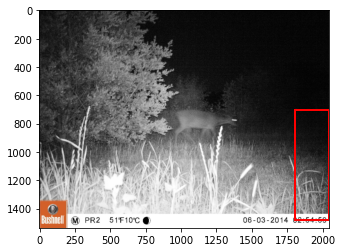

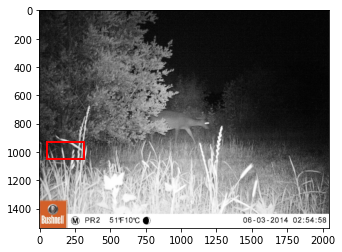

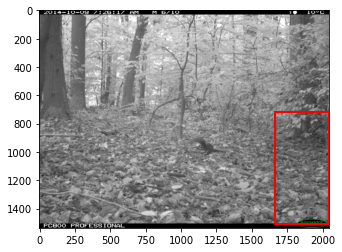

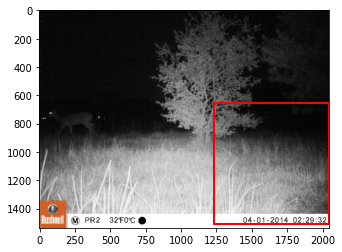

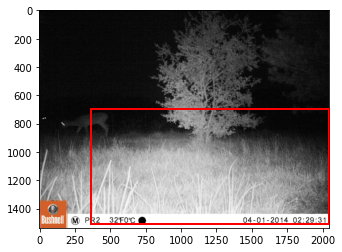

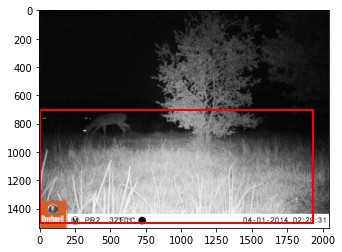

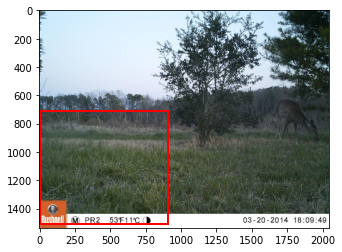

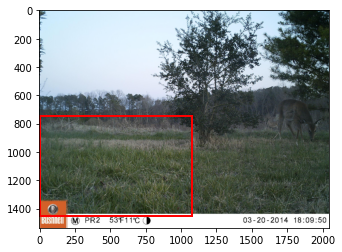

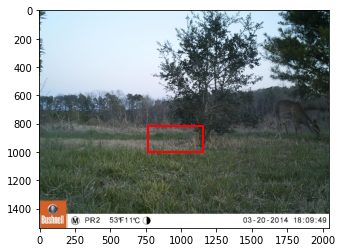

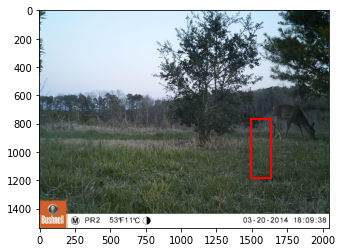

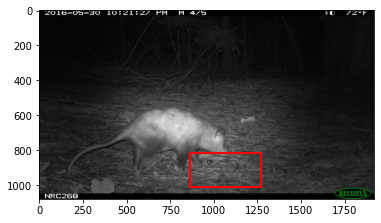

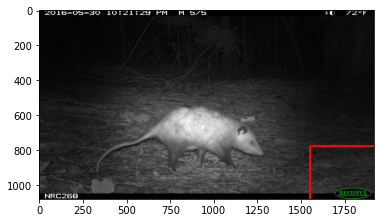

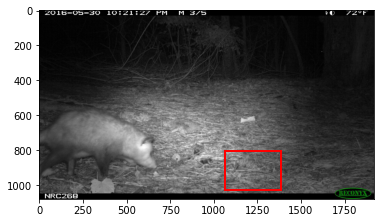

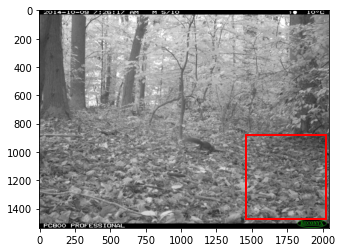

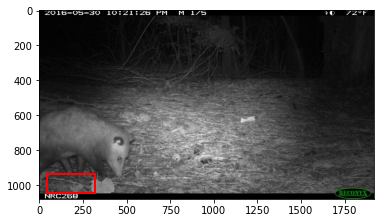

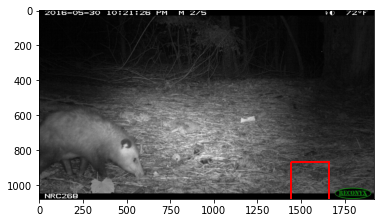

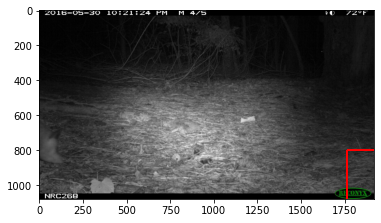

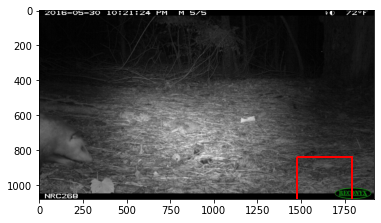

In [46]:
for i in range(1000,1050):
    boundingBox(imgpaths[i], metadata['annotations'][i]['bbox'])

In [47]:
metadata['images']

[{'id': '1', 'file_name': '1.jpg', 'width': 1920, 'height': 1080},
 {'id': '10', 'file_name': '10.jpg', 'width': 1920, 'height': 1080},
 {'id': '100', 'file_name': '100.jpg', 'width': 1920, 'height': 1080},
 {'id': '1000', 'file_name': '1000.jpg', 'width': 2048, 'height': 1536},
 {'id': '1001', 'file_name': '1001.jpg', 'width': 2048, 'height': 1536},
 {'id': '1002', 'file_name': '1002.jpg', 'width': 2048, 'height': 1536},
 {'id': '1003', 'file_name': '1003.jpg', 'width': 2048, 'height': 1536},
 {'id': '1004', 'file_name': '1004.jpg', 'width': 2048, 'height': 1536},
 {'id': '1005', 'file_name': '1005.jpg', 'width': 2048, 'height': 1536},
 {'id': '1006', 'file_name': '1006.jpg', 'width': 2048, 'height': 1536},
 {'id': '1007', 'file_name': '1007.jpg', 'width': 2048, 'height': 1536},
 {'id': '1008', 'file_name': '1008.jpg', 'width': 2048, 'height': 1536},
 {'id': '1009', 'file_name': '1009.jpg', 'width': 2048, 'height': 1536},
 {'id': '101', 'file_name': '101.jpg', 'width': 2048, 'height':

{'id': 'da647b6e-1df9-11ea-bd76-5cf370671a19',
 'image_id': '105',
 'category_id': 1,
 'bbox': [358.705152, 1214.126592, 508.831744, 281.95584]}